In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import requests
from xml.etree import ElementTree

In [2]:
response = requests.get('https://www.capitalbikeshare.com/data/stations/bikeStations.xml')

In [3]:
tree = ElementTree.fromstring(response.content)

In [4]:
data = []
columns = ['id', 'name', 'lat', 'long', 'temporary', 'public', 'nbBikes', 'nbEmptyDocks']
for station in tree:
    data.append({c : station.find(c).text for c in columns})
    
data = pd.DataFrame(data)
for i in ['id', 'lat', 'long', 'nbBikes', 'nbEmptyDocks']:
    data[i] = pd.to_numeric(data[i])
    


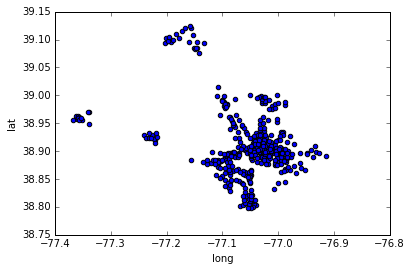

In [5]:
data.plot(x='long', y='lat', kind='scatter')

In [7]:
len(data)

441

In [8]:
data.to_csv('stations.csv')

In [13]:
import polyline
import requests

url_polyline = 'http://192.168.99.100:5000/table/v1/bike/polyline({0})'
url = 'http://192.168.99.100:5000/table/v1/bike/{0}'

c = []
for i,r in data.iterrows():
    if i < 20:
        c.append((r['lat'], r['long']))
#print(c)
p = polyline.encode(c, 5)

print(p)

coord_l = ';'.join(['{0},{1}'.format(r['long'], r['lat']) for i,r in data.iterrows() if i < 10])
print(coord_l)

res = requests.get(url_polyline.format(p))
#res = requests.get(url.format(coords_l))

qsdlFtmhuMvIPbDqXkVfAjMz|@uZxAwG~Sjf@akAka@lIjyA_Gnc@gG{aAoAhOvIauH{t@ckBobAciAwY`Tnu@vRvd@eW{_AnUn_B
-77.05323,38.858971000000004;-77.05332,38.85725;-77.04923199999999,38.856425;-77.049593,38.860170000000004;-77.05949,38.857865999999994;-77.059936,38.862303000000004;-77.0633,38.8637;-77.05113172531128,38.857404962615036;-77.0528,38.8629;-77.051516,38.848440999999994


In [14]:
res.json()

{'code': 'Ok',
 'destinations': [{'hint': '01oNgP-MDoDk6wMABQAAAOEAAACLAQAAAAAAAAUAAADhAAAAiwEAAAAAAADk5wcAWgAAAGJCaPvM8FAC0kJo-9rwUAIGAAICxto8gA==',
   'location': [-77.053342, 38.858956],
   'name': 'South Eads Street'},
  {'hint': '0loNgBwhFYAA7QEAMwAAAKMAAAAAAAAAGQAAADMAAACjAAAAAAAAABkAAADj5wcAWgAAAGlCaPtt6lACeEJo-yLqUAIAAAYCxto8gA==',
   'location': [-77.053335, 38.857325],
   'name': '18th Street South'},
  {'hint': 'RkAGgEhABoAQ8gMA8QAAAFIAAAA8AAAAAAAAAPEAAABSAAAAPAAAAAAAAAAM3AMAWgAAABJSaPvx5lACclJo--7mUAIBAAICxto8gA==',
   'location': [-77.049326, 38.856433],
   'name': 'South Crystal Drive'},
  {'hint': 'CI0OgMLlDoBU6wEAVQAAAD0AAABqAQAAAAAAAFUAAAA9AAAAagEAAAAAAADzgQgAWgAAAA5RaPsx9VACClFo-4r1UAICAAYCxto8gA==',
   'location': [-77.049586, 38.860081],
   'name': '15th Street South'},
  {'hint': 'rqgMgNSoDIAAAAAABAAAAC4AAAAAAAAAAAAAAAQAAAAuAAAAAAAAAAAAAABXiQcAWgAAAG4qaPuc7FACXipo-47sUAIAAAYGxto8gA==',
   'location': [-77.059474, 38.857884],
   'name': ''},
  {'hint': 'SaYMgHGmDIAA

In [29]:
import polyline
import requests

url_polyline = 'http://192.168.99.100:5000/trip/v1/bike/polyline({0})'
url = 'http://192.168.99.100:5000/table/v1/bike/{0}'

c = []
for i,r in data.iterrows():
    c.append((r['lat'], r['long']))
#print(c)
p = polyline.encode(c, 5)

print(p)

coord_l = ';'.join(['{0},{1}'.format(r['long'], r['lat']) for i,r in data.iterrows() if i < 10])
print(coord_l)

res = requests.get(url_polyline.format(p))
#res = requests.get(url.format(coords_l))
result = res.json()

qsdlFtmhuMvIPbDqXkVfAjMz|@uZxAwG~Sjf@akAka@lIjyA_Gnc@gG{aAoAhOvIauH{t@ckBobAciAwY`Tnu@vRvd@eW{_AnUn_Bku@gv@~wIgbCenE~fBuPgPnXzBzkAjnAc[nKg{EujCcH|q@bQchFfdE`rC~rAifGo`GftIzxL{pKqnMjvPt~I__RcvByqA_Zya@|pFvhIk\gh@}lDfzIgtCmkGvJx|Cco@cVf{HcfB{_GbrFS_kChbKtbEimCivHgrEj}FnZoqFfAh`GbO{q@|S{pClxAepA~\scBcVSsnDvgIyiEn|CtfE_zHvoEwpBcsJd}PbWayAqoAsxFl_OcsIol@cm@yuAd`DgnA~xEdb@gjOfi@rtNs|At`EqcEgiLdqFhzI`u@ewCgi@pVsYvwD`rAawJs`Cx_H}jG`kFtfH{xPfRtaEwJtxAoh@mfAiiCxbCzwCx@cA~uBvgD{aGqoB_vCofCh{L~cB{nFrBai@alEw{DreCjjAvcAgh@wAnU?gvBh`AflBcB}iAzcC{pDe_DhlDm`C|zHjjBm_A`WlVmP}y@w\xcBwi@jg@vsAerD~QxjDo_BhnDno@utNaWbcK|i@mnHaB~]_r@xjBaiB|lGdxCuoFxpI~sBsyFyW{tAoyB~IdnCsF|bC~OfGfFnXzIhr@{As_@`eDozW}fDlmQrT`~G}dEcpH|vAq]jCif@z_Bn_JjMbYn@fJ{hAklIjlAglCzRkHjQq`BcdE`~BwtDjQzcDaoAknAzfAv_AdhB|lDeeSe{FxbVzqEwsQut@x{QhnBgiMhiGpY_eEllV}^qVk_BclBga@wwJvfB~}L{~@uyBxkBuaMgrGl|Lae@atKd~GxuPkFf\wCsxA{Vs|Jk@aWz|@v~PcaBwtRhGd|KyOnQt`@kq@t{@r~@i@~_C}H_NpPw`MpqAaeIekBjuXlWaw@y[ii@}~Bs{SlHx{Ho@meBfMnpBcC}RfjRyQ_IvQsd@bGz`@r_

# Distance and duration for trip

In [39]:
print('Distance ', result['trips'][0]['distance'])
print('Duration ', result['trips'][0]['duration'] / (60 * 60))

Distance  425876.3
Duration  32.170861111111115


# Formatting coordinates for map

L.latLng(38.858956, -77.053342),
L.latLng(38.860081, -77.049586),
L.latLng(38.862978, -77.052793),
L.latLng(38.86464, -77.048585),
L.latLng(38.866491, -77.048292),
L.latLng(38.879786, -77.03741),
L.latLng(38.884113, -77.04658),
L.latLng(38.888271, -77.049394),
L.latLng(38.890523, -77.049345),
L.latLng(38.892441, -77.048854),
L.latLng(38.89246, -77.046671),
L.latLng(38.8923, -77.043483),
L.latLng(38.888128, -77.038317),
L.latLng(38.878294, -77.030046),
L.latLng(38.888593, -77.032412),
L.latLng(38.888785, -77.02858),
L.latLng(38.887239, -77.028177),
L.latLng(38.887311, -77.025863),
L.latLng(38.88438, -77.025785),
L.latLng(38.876809, -77.021187),
L.latLng(38.886323, -77.02224),
L.latLng(38.887243, -77.018867),
L.latLng(38.890467, -77.01725),
L.latLng(38.886961, -77.013617),
L.latLng(38.88412, -77.017556),
L.latLng(38.876716, -77.017703),
L.latLng(38.874299, -77.005807),
L.latLng(38.876438, -77.003699),
L.latLng(38.874897, -77.0024),
L.latLng(38.87861, -77.00589),
L.latLng(38.881135, -77.0

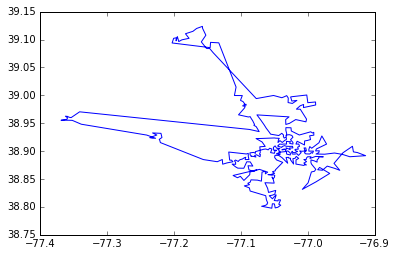

In [66]:
waypoints = result['waypoints']
waypoints.sort(key=lambda x: x['waypoint_index'])

p = []
for i in waypoints:
    p.append(i['location'])
    print('L.latLng({0}, {1}),'.format(i['location'][1], i['location'][0]))

plt.plot([i[0] for i in p], [i[1] for i in p])

In [23]:
result['waypoints']

[{'hint': '01oNgP-MDoDk6wMABQAAAOEAAACLAQAAAAAAAAUAAADhAAAAiwEAAAAAAADk5wcAWgAAAGJCaPvM8FAC0kJo-9rwUAIGAAICxto8gA==',
  'location': [-77.053342, 38.858956],
  'name': 'South Eads Street',
  'trips_index': 0,
  'waypoint_index': 0},
 {'hint': '0loNgBwhFYAA7QEAMwAAAKMAAAAAAAAAGQAAADMAAACjAAAAAAAAABkAAADj5wcAWgAAAGlCaPtt6lACeEJo-yLqUAIAAAYCxto8gA==',
  'location': [-77.053335, 38.857325],
  'name': '18th Street South',
  'trips_index': 0,
  'waypoint_index': 1},
 {'hint': 'RkAGgEhABoAQ8gMA8QAAAFIAAAA8AAAAAAAAAPEAAABSAAAAPAAAAAAAAAAM3AMAWgAAABJSaPvx5lACclJo--7mUAIBAAICxto8gA==',
  'location': [-77.049326, 38.856433],
  'name': 'South Crystal Drive',
  'trips_index': 0,
  'waypoint_index': 3},
 {'hint': 'CI0OgMLlDoBU6wEAVQAAAD0AAABqAQAAAAAAAFUAAAA9AAAAagEAAAAAAADzgQgAWgAAAA5RaPsx9VACClFo-4r1UAICAAYCxto8gA==',
  'location': [-77.049586, 38.860081],
  'name': '15th Street South',
  'trips_index': 0,
  'waypoint_index': 49},
 {'hint': 'rqgMgNSoDIAAAAAABAAAAC4AAAAAAAAAAAAAAAQAAAAuAAAAAAAAAAAAAA

# Exploring basic statistics

In [2]:
data = pd.read_csv('stations.csv')

In [6]:
data['nbBikes'].sum()

3141

In [24]:
trips = pd.concat([pd.read_csv('2016-Q3-cabi-trips-history-data/2016-Q3-Trips-History-Data-1.csv', infer_datetime_format=True, parse_dates=['Start date', 'End date']),
                  pd.read_csv('2016-Q3-cabi-trips-history-data/2016-Q3-Trips-History-Data-2.csv', infer_datetime_format=True, parse_dates=['Start date', 'End date'])])

In [26]:
trips = trips.sort_values(by='Start date')

In [27]:
trips['Start date'].max() - trips['Start date'].min()

Timedelta('91 days 23:59:00')

In [28]:
trips.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
723739,430365,2016-07-01 00:00:00,2016-07-01 00:07:00,31023,Fairfax Dr & Wilson Blvd,31025,Central Library / N Quincy St & 10th St N,W20623,Casual
723740,696813,2016-07-01 00:00:00,2016-07-01 00:12:00,31620,5th & F St NW,31628,1st & K St SE,W00777,Registered
723738,623359,2016-07-01 00:00:00,2016-07-01 00:10:00,31105,14th & Harvard St NW,31105,14th & Harvard St NW,W20029,Registered
723736,456086,2016-07-01 00:01:00,2016-07-01 00:08:00,31202,14th & R St NW,31234,20th & O St NW / Dupont South,W00068,Registered
723737,1099427,2016-07-01 00:01:00,2016-07-01 00:19:00,31268,12th & U St NW,31506,1st & Rhode Island Ave NW,W20726,Registered


In [35]:
trips['Bike number'].unique().size

4095

In [33]:
len(trips) / 92

11608.554347826086